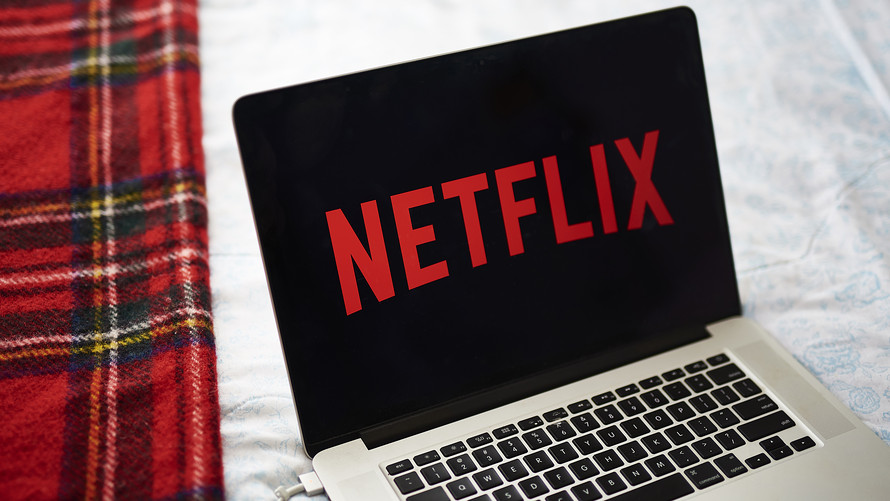

In [1]:
from IPython import display
display.Image("https://s.marketwatch.com/public/resources/images/MW-HT272_Netfli_ZH_20191014153615.jpg")

TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Kaggle's [link here](https://www.kaggle.com/shivamb/netflix-shows).

## Extracting Dataset of Netflix TV Shows and Movies

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Cleaning

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.drop(columns= ['director', 'cast'], inplace= True)

In [8]:
df.country.value_counts().head()

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

In [9]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [10]:
df.country.fillna('United States', inplace= True)
df.rating.fillna('TV-MA', inplace= True)
df.dropna(subset= ['date_added'], inplace= True)
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Visualization

Text(0.5,1,'Netflix Palette')

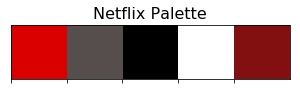

In [12]:
netflix_palette= sns.palplot(['#db0000', '#564d4d', '#000000', '#ffffff', '#831010'])
plt.title('Netflix Palette', fontsize= 16)

Text(0.5,1,'Movie - TV Show')

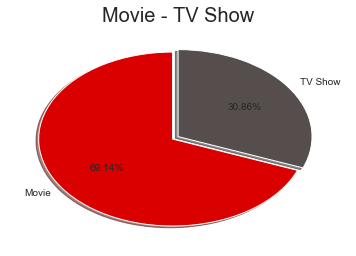

In [13]:
sns.set_palette(['#db0000', '#564d4d'])
sns.set_style('whitegrid')
plt.pie(x= df.type.value_counts(), labels= df.type.value_counts().index, explode= [0.05, 0],
       autopct= '%1.2f%%', shadow= True, startangle= 90)
plt.title('Movie - TV Show', fontsize= 20)

Text(0.5,1,'Top 10 - Type per Country')

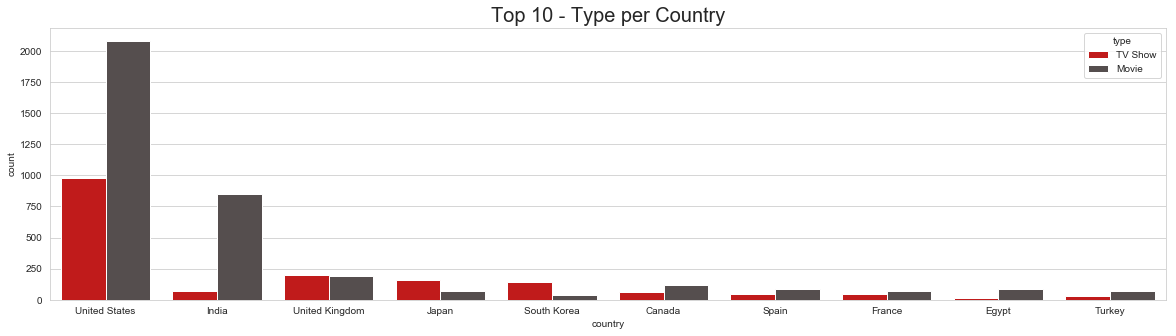

In [14]:
plt.subplots(figsize= (20,5))
top_country= df.country.value_counts().head(10)
sns.countplot(x= df.country, order= top_country.index, hue= df.type)
plt.title('Top 10 - Type per Country', fontsize= 20)

In [15]:
df['year_added']= df.date_added.apply(lambda x: x.split(' ')[-1])
df['year_added']= df['year_added'].astype(str).astype(int)
df.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added       int32
dtype: object

Text(0.5,1,'Year Added per Type')

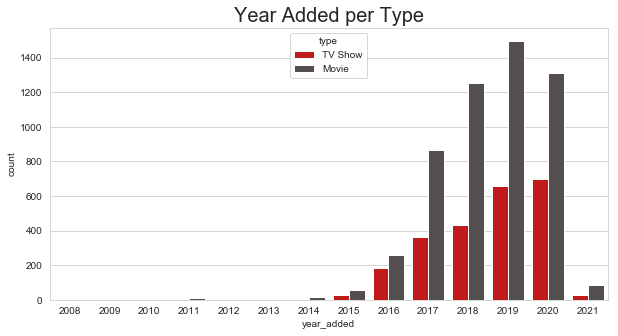

In [16]:
plt.figure(figsize= (10,5))
sns.countplot(x= df.year_added, hue= df.type)
plt.title('Year Added per Type', fontsize= 20)

Text(0.5,1,'Titles Realise per Year(1990 - 2020)')

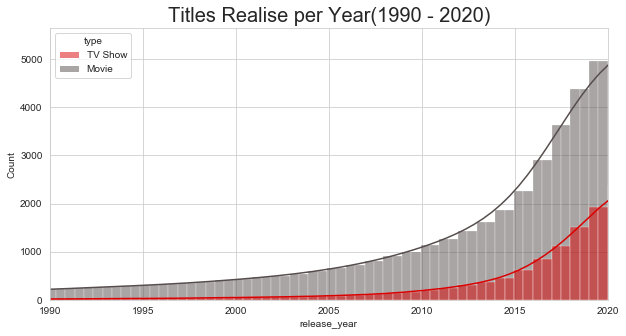

In [17]:
plt.figure(figsize= (10,5))
ax=sns.histplot(x= df.release_year, hue= df.type, kde= True, cumulative= True)
plt.xlim(1990,2020)
plt.title('Titles Realise per Year(1990 - 2020)', fontsize= 20)

In [18]:
df['min_season']= df.duration.apply(lambda x: x.split(' ')[0])
df['min_season']= df['min_season'].astype(str).astype(int)

Text(0.5,1,'Duration per TV Show(Season)')

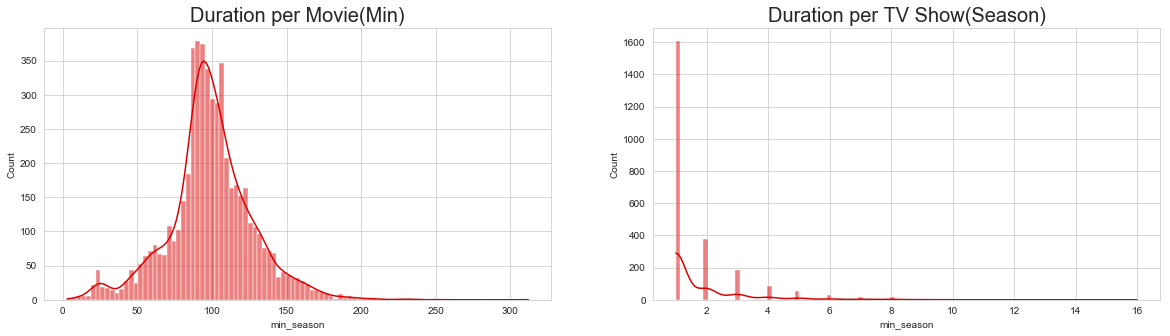

In [19]:
df_movie= df[df['type']== 'Movie']
df_show= df[df['type']== 'TV Show']

figura= plt.figure(figsize= (20,5))
figura.add_subplot(1,2,1)
sns.histplot(df_movie.min_season, kde= True)
plt.title('Duration per Movie(Min)', fontsize= 20)

figura.add_subplot(1,2,2)
sns.histplot(df_show.min_season, kde= True)
plt.title('Duration per TV Show(Season)', fontsize= 20)

C:\SQL2019\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5,1,'Rating per Type')

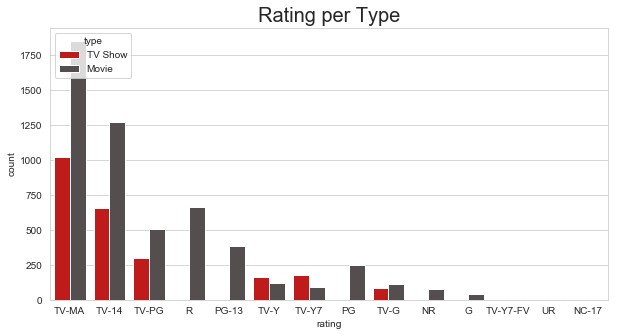

In [20]:
plt.figure(figsize= (10,5))
sns.countplot(df.rating, order= df.rating.value_counts().index, hue= df.type)
plt.title('Rating per Type', fontsize= 20)

Text(0.5,1,'Top 15 - Genre TV Show')

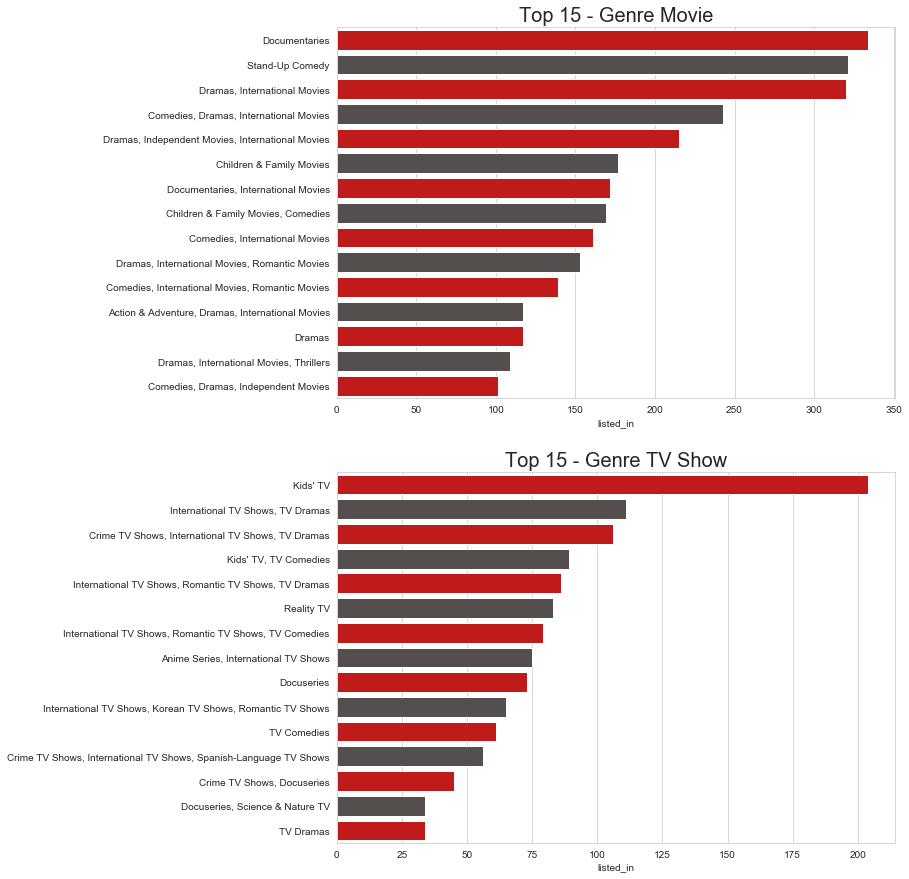

In [21]:
figura= plt.figure(figsize= (10,15))

figura.add_subplot(2,1,1)
sns.barplot(x= df_movie.listed_in.value_counts().head(15), y= df_movie.listed_in.value_counts().head(15).index,
           palette= ['#db0000', '#564d4d'])
plt.title('Top 15 - Genre Movie', fontsize= 20)

figura.add_subplot(2,1,2)
sns.barplot(x= df_show.listed_in.value_counts().head(15), y= df_show.listed_in.value_counts().head(15).index,
           palette= ['#db0000', '#564d4d'])
plt.title('Top 15 - Genre TV Show', fontsize= 20)